In [1]:
!pip install enasearch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.9/234.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.3/119.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [25]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import re  # For extracting numbers from strings

# List of file paths
file_paths = [
    '/content/drive/MyDrive/Project_health_hackathon/PBMC-Healthy-RNA-seq (1).csv',
    '/content/drive/MyDrive/Project_health_hackathon/PBMC-Healthy-RNA-seqPart1+2Age.csv'
]

# List to store processed DataFrames
dataframes = []

print("Processing Each File:\n")

# Process each file
for file_path in file_paths:
    # Load the file
    data = pd.read_csv(file_path)
    print(f"File: {file_path}")
    print(f"Original Columns: {list(data.columns)}")
    print(f"Original Shape: {data.shape}")

    # Extract only the 'Run' and 'age' columns
    if 'Run' in data.columns and 'age' in data.columns:
        data = data[['Run', 'age']]
        print(f"Filtered Columns: {list(data.columns)}")
        print(f"Filtered Shape: {data.shape}")

        # Extract only numbers from the 'age' column
        data['age'] = data['age'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else None)

    else:
        print(f"Error: Required columns 'Run' and 'age' not found in {file_path}")
        continue  # Skip files that don't have the required columns

    # Save the processed DataFrame to the list
    dataframes.append(data)
    print("Filtered and Processed Content (first 5 rows):")
    print(data.head(), "\n")

# Combine all DataFrames into one
combined_data = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame details
print("\nCombined DataFrame Details:")
print(f"Columns: {list(combined_data.columns)}")
print(f"Shape: {combined_data.shape}")
print("Content (first 5 rows):")
print(combined_data.head(), "\n")

# Save the combined DataFrame to a CSV file
combined_data.to_csv('/content/drive/MyDrive/Project_health_hackathon/combined_metadata.csv', index=False)
print("Combined DataFrame saved to 'combined_metadata.csv'")

Processing Each File:

File: /content/drive/MyDrive/Project_health_hackathon/PBMC-Healthy-RNA-seq (1).csv
Original Columns: ['Run', 'LoadDate', 'Experiment', 'SRAStudy', 'BioProject', 'Sample', 'BioSample', 'SampleName', 'Submission', 'dbgap_study_accession', 'age', 'race', 'sex']
Original Shape: (323, 13)
Filtered Columns: ['Run', 'age']
Filtered Shape: (323, 2)
Filtered and Processed Content (first 5 rows):
           Run  age
0  SRR23920268   20
1  SRR23920267   20
2  SRR23920266   20
3  SRR23920265   20
4  SRR23920264   20 

File: /content/drive/MyDrive/Project_health_hackathon/PBMC-Healthy-RNA-seqPart1+2Age.csv
Original Columns: ['Run', 'LoadDate', 'Experiment', 'SRAStudy', 'BioProject', 'Sample', 'BioSample', 'SampleName', 'Submission', 'dbgap_study_accession', 'age', 'race', 'sex']
Original Shape: (17, 13)
Filtered Columns: ['Run', 'age']
Filtered Shape: (17, 2)
Filtered and Processed Content (first 5 rows):
           Run  age
0  SRR11652531   43
1  SRR11652533   35
2  SRR11652

In [3]:
combined_data

,Run,age
0,SRR23920268,20
1,SRR23920267,20
2,SRR23920266,20
3,SRR23920265,20
4,SRR23920264,20
...,...,...
335,SRR3352081,39
336,SRR3352082,35
337,SRR3352083,30
338,SRR3352084,31


In [4]:
# prompt: print the average, max and min  of the age in the combined data

# Calculate the average, max, and min of the 'age' column in the combined data
if 'age' in combined_data.columns:
  average_age = combined_data['age'].mean()
  max_age = combined_data['age'].max()
  min_age = combined_data['age'].min()

  print(f"Average Age: {average_age}")
  print(f"Maximum Age: {max_age}")
  print(f"Minimum Age: {min_age}")
else:
  print("Error: 'age' column not found in the combined data.")

Average Age: 44.11176470588235
Maximum Age: 90
Minimum Age: 18


In [5]:
# Extract the 'Run' column as a list of SRR IDs
run_ids = data['Run'].tolist()
print(run_ids[:5])  # Display the first few IDs to verify

['SRR11652531', 'SRR11652533', 'SRR11652535', 'SRR11652537', 'SRR11652539']


In [6]:
import os

# Specify the directory in Google Drive where you want to save the data
download_directory = '/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads'
os.makedirs(download_directory, exist_ok=True)

# Loop through each Run ID and download the fastq file
for run_id in run_ids:
    # Construct the URL based on the SRR ID format
    url = f"https://ftp.sra.ebi.ac.uk/vol1/fastq/{run_id[:6]}/{run_id[9:12]}/{run_id}/{run_id}.fastq.gz"

    # Specify the output file path
    output_path = os.path.join(download_directory, f"{run_id}.fastq.gz")

    # Download the file with wget
    !wget -O {output_path} {url}

--2024-11-30 17:19:31--  https://ftp.sra.ebi.ac.uk/vol1/fastq/SRR116/31/SRR11652531/SRR11652531.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-30 17:19:32 ERROR 404: Not Found.

--2024-11-30 17:19:32--  https://ftp.sra.ebi.ac.uk/vol1/fastq/SRR116/33/SRR11652533/SRR11652533.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-30 17:19:32 ERROR 404: Not Found.

--2024-11-30 17:19:32--  https://ftp.sra.ebi.ac.uk/vol1/fastq/SRR116/35/SRR11652535/SRR11652535.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting respons

In [7]:
import os

# Directory where the files are stored
download_directory = '/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads'

# List the files
files = os.listdir(download_directory)
print(files)

['SRR27190051.fastq.gz', 'SRR27190050.fastq.gz', 'SRR27190049.fastq.gz', 'SRR27190048.fastq.gz', 'SRR27190047.fastq.gz', 'SRR27190046.fastq.gz', 'SRR27190045.fastq.gz', 'SRR27190044.fastq.gz', 'SRR27190043.fastq.gz', 'SRR27190042.fastq.gz', 'SRR27190041.fastq.gz', 'SRR27190040.fastq.gz', 'SRR27190039.fastq.gz', 'SRR27190038.fastq.gz', 'SRR27190037.fastq.gz', 'SRR27190092.fastq.gz', 'SRR27190091.fastq.gz', 'SRR27190090.fastq.gz', 'SRR27190089.fastq.gz', 'SRR27190088.fastq.gz', 'SRR27190087.fastq.gz', 'SRR27190086.fastq.gz', 'SRR27190085.fastq.gz', 'SRR27190084.fastq.gz', 'SRR27190083.fastq.gz', 'SRR27190082.fastq.gz', 'SRR27190081.fastq.gz', 'SRR27602614.fastq.gz', 'SRR27602615.fastq.gz', 'SRR27602612.fastq.gz', 'SRR27602613.fastq.gz', 'SRR27602608.fastq.gz', 'SRR27602609.fastq.gz', 'SRR27602604.fastq.gz', 'SRR27602605.fastq.gz', 'SRR27602610.fastq.gz', 'SRR27602611.fastq.gz', 'SRR27602606.fastq.gz', 'SRR27602607.fastq.gz', 'SRR27602602.fastq.gz', 'SRR27602603.fastq.gz', 'SRR27602598.fa

In [8]:
# Choose one of the files to inspect
file_path = os.path.join(download_directory, files[0])  # Replace `files[0]` with the specific filename if needed

# Open and read the first few lines
with open(file_path, 'r') as file:
    # Read the first 8 lines (two complete reads)
    for _ in range(8):
        line = file.readline().strip()
        print(line)

In [9]:
!pip install biopython

In [10]:
from Bio import SeqIO

# Parse the FASTQ file and display the first few records
for record in SeqIO.parse(file_path, "fastq"):
    print("ID:", record.id)
    print("Sequence:", record.seq)
    print("Quality:", record.letter_annotations["phred_quality"])
    break  # Display only the first record for brevity

In [11]:
# Download directly from ENA to Colab's temporary storage and test
!wget -O /content/test_file.fastq.gz "https://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/009/SRR27190051/SRR27190051.fastq.gz"

# Unzip if needed
!gunzip /content/test_file.fastq.gz

# Read the unzipped file
with open("/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/ena-file-download-read_run-SRR27190051-fastq_ftp-20241109-1439.sh", 'r') as file:
    for _ in range(8):
        print(file.readline().strip())

--2024-11-30 17:19:41--  https://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/009/SRR27190051/SRR27190051.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-30 17:19:42 ERROR 404: Not Found.


gzip: /content/test_file.fastq.gz: unexpected end of file
wget -nc ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/051/SRR27190051/SRR27190051_1.fastq.gz
wget -nc ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/051/SRR27190051/SRR27190051_2.fastq.gz








In [12]:
# Define the file path
file_path = '/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/ena-file-download-read_run-SRR27190051-fastq_ftp-20241109-1439.sh'

# Open and read the file
with open(file_path, 'r') as file:
    content = file.read()

# Print the file contents
print(content)

wget -nc ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/051/SRR27190051/SRR27190051_1.fastq.gz
wget -nc ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/051/SRR27190051/SRR27190051_2.fastq.gz



In [13]:
!wget -nc ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/051/SRR27190051/SRR27190051_1.fastq.gz
!wget -nc ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/051/SRR27190051/SRR27190051_2.fastq.gz

--2024-11-30 17:19:43--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/051/SRR27190051/SRR27190051_1.fastq.gz
           => ‘SRR27190051_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR271/051/SRR27190051 ... done.
==> SIZE SRR27190051_1.fastq.gz ... 119383725
==> PASV ... done.    ==> RETR SRR27190051_1.fastq.gz ... done.
Length: 119383725 (114M) (unauthoritative)

SRR27190051_1.fastq 100%[===================>] 113.85M  29.0MB/s    in 3.9s    

2024-11-30 17:19:48 (29.0 MB/s) - ‘SRR27190051_1.fastq.gz’ saved [119383725]

--2024-11-30 17:19:48--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/051/SRR27190051/SRR27190051_2.fastq.gz
           => ‘SRR27190051_2.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.

In [14]:
# Directory in Google Drive
destination = "/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads"

# Download files to the specified directory
!wget -nc -P {destination} ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/051/SRR27190051/SRR27190051_1.fastq.gz
!wget -nc -P {destination} ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR271/051/SRR27190051/SRR27190051_2.fastq.gz

File ‘/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/SRR27190051_1.fastq.gz’ already there; not retrieving.
File ‘/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/SRR27190051_2.fastq.gz’ already there; not retrieving.


In [15]:
# Path to the FASTQ files
file_path_1 = '/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/SRR27190051_1.fastq.gz'
file_path_2 = '/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/SRR27190051_2.fastq.gz'

# Function to read and print the first few lines of a FASTQ file
import gzip

def preview_fastq(file_path, num_lines=8):
    with gzip.open(file_path, 'rt') as file:
        for _ in range(num_lines):
            print(file.readline().strip())

# Preview the first FASTQ file
print("Contents of SRR27190051_1.fastq.gz:")
preview_fastq(file_path_1)

# Preview the second FASTQ file
print("\nContents of SRR27190051_2.fastq.gz:")
preview_fastq(file_path_2)

Contents of SRR27190051_1.fastq.gz:
@SRR27190051.1 M08180:4:000000000-KK326:1:1101:19988:1894/1
GCGAGGTAACACGTTTTTCATGTCCTCGAGCACTGTCAGCCTTGTTCCTTTCCCAATATTCTTCGTATCTTTGCTCACAGCCTGGTTGCCCAGGACAAAAACCCCCCGTACAGCTGTTGATGTTGATCTTATGTGCCCACGTCTGAACTCCATTCTCTACTTTTTCTCTCCTATGCCGTCTTCTTCTTGTTATAACTTCTTTTTTTTTTTTTTTTCTTCTTTTTTTTTTTTTTTTTTGTCAGTCTCATCCATTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTCTTTTT
+
????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????
@SRR27190051.2 M08180:4:000000000-KK326:1:1101:9391:1912/1
TTAACGGAACACGTTTTTCAGGTCCTCGAGCACTGTCAGCCGGGTGCCTGGGCCAAAATACTGCGTATCTGTTCTCACAGCCTCGATGCCCAGGTCAAAAACCCTTTCTTCCCGCTCTTCTGTCCCATACTCCGCTCGGGTCCTTCCCACCTCTTAGTGCCCCATCGCTCTCCCATCACCCTTAACCATGTGTCCCCCCGTACTTCATCCCACTCATATCGTAATTGCACACTTCTTAACT

#Now testing and preperations are done, we shall move to the real work


##Reading the files and applying one hot encoding

In [16]:
import gzip

# Function to read FASTQ file and return sequences as a list
def load_fastq_sequences(file_path, num_reads=1000):
    sequences = []
    with gzip.open(file_path, 'rt') as file:
        while len(sequences) < num_reads:
            file.readline()  # Read header
            sequence = file.readline().strip()  # Read sequence
            file.readline()  # Skip '+'
            file.readline()  # Skip quality score
            sequences.append(sequence)
    return sequences




import numpy as np

# Define one-hot encoding dictionary
one_hot_mapping = {
    'A': [0, 0, 0, 1],
    'T': [0, 0, 1, 0],
    'G': [1, 0, 0, 0],
    'C': [0, 1, 0, 0]
}

# Function to convert a sequence to one-hot encoding
def one_hot_encode_sequence(sequence, max_length=100):
    encoded_sequence = [one_hot_mapping.get(nuc, [0, 0, 0, 0]) for nuc in sequence[:max_length]]
    # Pad or truncate to ensure uniform length
    if len(encoded_sequence) < max_length:
        encoded_sequence += [[0, 0, 0, 0]] * (max_length - len(encoded_sequence))
    return np.array(encoded_sequence)




In [17]:
!pip install transformers
!pip install tokenizers

#MODELS--Regression version





In [18]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import gzip

In [19]:


# Placeholder functions for loading FASTQ sequences and one-hot encoding
def load_fastq_sequences(file_path, num_reads=1000):
    sequences = []
    with gzip.open(file_path, 'rt') as file:
        while len(sequences) < num_reads:
            file.readline()  # Read header
            sequence = file.readline().strip()  # Read sequence
            file.readline()  # Skip '+'
            file.readline()  # Skip quality score
            sequences.append(sequence)
    return sequences

def one_hot_encode_sequence(sequence, max_length=100):
    one_hot_mapping = {
        'A': [0, 0, 0, 1],
        'T': [0, 0, 1, 0],
        'G': [1, 0, 0, 0],
        'C': [0, 1, 0, 0]
    }
    encoded_sequence = [one_hot_mapping.get(nuc, [0, 0, 0, 0]) for nuc in sequence[:max_length]]
    if len(encoded_sequence) < max_length:
        encoded_sequence += [[0, 0, 0, 0]] * (max_length - len(encoded_sequence))
    return np.array(encoded_sequence)

# Path to the CSV file with metadata
csv_path = '/content/drive/MyDrive/Project_health_hackathon/combined_metadata.csv'
sample_data = pd.read_csv(csv_path)

data = []  # Placeholder for one-hot encoded data
labels = []  # Placeholder for age labels

print("Processing Metadata and FASTQ Sequences:")

# Process each sample in the metadata
for index, sample in sample_data.iterrows():
    srr_id = sample.get("Run")
    age = sample.get("age")

    # Skip invalid samples
    if pd.isna(srr_id) or pd.isna(age):
        print(f"Skipping invalid sample at index {index}: {sample}")
        continue

    # Load sequences from the corresponding FASTQ file
    fastq_file_path = f'/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/{srr_id}.fastq.gz'

    try:
        sequences = load_fastq_sequences(fastq_file_path)
        encoded_sequences = [one_hot_encode_sequence(seq) for seq in sequences]
        flattened_sequence = np.concatenate(encoded_sequences, axis=0)
        data.append(flattened_sequence)
        labels.append(age)
    except FileNotFoundError:
        print(f"FASTQ file not found: {fastq_file_path}. Skipping this sample.")
        continue

# Convert data and labels to NumPy arrays
if not data or not labels:
    raise ValueError("No valid data or labels found. Check metadata and FASTQ files.")
data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

# Ensure the data shape is compatible with Conv1D
data = data.reshape(data.shape[0], -1, 4)

# Split into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Processing Metadata and FASTQ Sequences:


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import gzip

# Placeholder functions for loading FASTQ sequences and one-hot encoding
def load_fastq_sequences(file_path, num_reads=1000):
    sequences = []
    with gzip.open(file_path, 'rt') as file:
        while len(sequences) < num_reads:
            file.readline()  # Read header
            sequence = file.readline().strip()  # Read sequence
            file.readline()  # Skip '+'
            file.readline()  # Skip quality score
            sequences.append(sequence)
    return sequences

def one_hot_encode_sequence(sequence, max_length=100):
    one_hot_mapping = {
        'A': [0, 0, 0, 1],
        'T': [0, 0, 1, 0],
        'G': [1, 0, 0, 0],
        'C': [0, 1, 0, 0]
    }
    encoded_sequence = [one_hot_mapping.get(nuc, [0, 0, 0, 0]) for nuc in sequence[:max_length]]
    if len(encoded_sequence) < max_length:
        encoded_sequence += [[0, 0, 0, 0]] * (max_length - len(encoded_sequence))
    return np.array(encoded_sequence)

# Path to the CSV file with metadata
csv_path = '/content/drive/MyDrive/Project_health_hackathon/combined_metadata.csv'
sample_data = pd.read_csv(csv_path)

data = []  # Placeholder for one-hot encoded data
labels = []  # Placeholder for age labels

print("Processing Metadata and FASTQ Sequences:")

# Process each sample in the metadata
for index, sample in sample_data.iterrows():
    srr_id = sample.get("Run")
    age = sample.get("age")

    # Skip invalid samples
    if pd.isna(srr_id) or pd.isna(age):
        print(f"Skipping invalid sample at index {index}: {sample}")
        continue

    # Load sequences from the corresponding FASTQ file
    fastq_file_path = f'/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/{srr_id}.fastq.gz'

    try:
        sequences = load_fastq_sequences(fastq_file_path)
        encoded_sequences = [one_hot_encode_sequence(seq) for seq in sequences]
        flattened_sequence = np.concatenate(encoded_sequences, axis=0)
        data.append(flattened_sequence)
        labels.append(age)
    except FileNotFoundError:
        print(f"FASTQ file not found: {fastq_file_path}. Skipping this sample.")
        continue

# Convert data and labels to NumPy arrays
if not data or not labels:
    raise ValueError("No valid data or labels found. Check metadata and FASTQ files.")
data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

# Ensure the data shape is compatible with Conv1D
data = data.reshape(data.shape[0], -1, 4)

# Split into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

# Define and build the CNN model
def build_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv1D(64, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))  # Feature extraction layer
    return model

# Train the CNN
input_shape = (X_train.shape[1], X_train.shape[2])
cnn_model = build_cnn_model(input_shape)
cnn_model.add(layers.Dense(1, activation='linear'))  # Add the output layer
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Feature extraction from CNN
def extract_features(model, data):
    intermediate_model = models.Model(inputs=model.input, outputs=model.layers[-2].output)
    return intermediate_model.predict(data)

cnn_features_train = extract_features(cnn_model, X_train)
cnn_features_val = extract_features(cnn_model, X_val)
cnn_features_test = extract_features(cnn_model, X_test)

# Train Random Forest
scaler = StandardScaler()
cnn_features_train = scaler.fit_transform(cnn_features_train)
cnn_features_val = scaler.transform(cnn_features_val)
cnn_features_test = scaler.transform(cnn_features_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(cnn_features_train, y_train)

# Evaluate on test data
rf_predictions = rf_model.predict(cnn_features_test)
cnn_predictions = cnn_model.predict(X_test)

# Calculate evaluation metrics
cnn_mae = mean_absolute_error(y_test, cnn_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"CNN MAE on test data: {cnn_mae}")
print(f"Random Forest MAE on test data: {rf_mae}")

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import gzip
import joblib  # For saving and loading the combined model

# ---------------- Placeholder Functions ----------------
def load_fastq_sequences(file_path, num_reads=1000):
    sequences = []
    with gzip.open(file_path, 'rt') as file:
        while len(sequences) < num_reads:
            file.readline()  # Read header
            sequence = file.readline().strip()  # Read sequence
            file.readline()  # Skip '+'
            file.readline()  # Skip quality score
            sequences.append(sequence)
    return sequences

def one_hot_encode_sequence(sequence, max_length=100):
    one_hot_mapping = {
        'A': [0, 0, 0, 1],
        'T': [0, 0, 1, 0],
        'G': [1, 0, 0, 0],
        'C': [0, 1, 0, 0]
    }
    encoded_sequence = [one_hot_mapping.get(nuc, [0, 0, 0, 0]) for nuc in sequence[:max_length]]
    if len(encoded_sequence) < max_length:
        encoded_sequence += [[0, 0, 0, 0]] * (max_length - len(encoded_sequence))
    return np.array(encoded_sequence)

# ---------------- Load Data ----------------
csv_path = '/content/drive/MyDrive/Project_health_hackathon/combined_metadata.csv'
sample_data = pd.read_csv(csv_path)

data = []
labels = []

print("Processing Metadata and FASTQ Sequences:")
for index, sample in sample_data.iterrows():
    srr_id = sample.get("Run")
    age = sample.get("age")
    if pd.isna(srr_id) or pd.isna(age):
        continue
    fastq_file_path = f'/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/{srr_id}.fastq.gz'
    try:
        sequences = load_fastq_sequences(fastq_file_path)
        encoded_sequences = [one_hot_encode_sequence(seq) for seq in sequences]
        flattened_sequence = np.concatenate(encoded_sequences, axis=0)
        data.append(flattened_sequence)
        labels.append(age)
    except FileNotFoundError:
        continue

data = np.array(data)
labels = np.array(labels)
data = data.reshape(data.shape[0], -1, 4)

X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# ---------------- Define CNN Model ----------------
def build_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv1D(64, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))  # Feature extraction layer
    return model

# Train the CNN
input_shape = (X_train.shape[1], X_train.shape[2])
cnn_model = build_cnn_model(input_shape)
cnn_model.add(layers.Dense(1, activation='linear'))  # Add the output layer
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val))

# ---------------- Feature Extraction ----------------
def extract_features(model, data):
    intermediate_model = models.Model(inputs=model.input, outputs=model.layers[-2].output)
    return intermediate_model.predict(data)

cnn_features_train = extract_features(cnn_model, X_train)
cnn_features_val = extract_features(cnn_model, X_val)
cnn_features_test = extract_features(cnn_model, X_test)

# Train Random Forest
scaler = StandardScaler()
cnn_features_train = scaler.fit_transform(cnn_features_train)
cnn_features_val = scaler.transform(cnn_features_val)
cnn_features_test = scaler.transform(cnn_features_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(cnn_features_train, y_train)

# ---------------- Combine CNN and RF into One Model ----------------
class CombinedModel:
    def __init__(self, cnn_model, rf_model, scaler):
        self.cnn_model = cnn_model
        self.rf_model = rf_model
        self.scaler = scaler

    def predict(self, data):
        # Extract features using the CNN
        features = extract_features(self.cnn_model, data)
        # Scale the features
        scaled_features = self.scaler.transform(features)
        # Predict using the Random Forest
        return self.rf_model.predict(scaled_features)

    def save(self, path):
        # Save CNN, RF, and Scaler
        self.cnn_model.save(f"{path}_cnn.h5")
        joblib.dump(self.rf_model, f"{path}_rf.pkl")
        joblib.dump(self.scaler, f"{path}_scaler.pkl")

    @staticmethod
    def load(path):
        # Load CNN, RF, and Scaler
        from tensorflow.keras.models import load_model
        cnn_model = load_model(f"{path}_cnn.h5")
        rf_model = joblib.load(f"{path}_rf.pkl")
        scaler = joblib.load(f"{path}_scaler.pkl")
        return CombinedModel(cnn_model, rf_model, scaler)

# Save the combined model
combined_model = CombinedModel(cnn_model, rf_model, scaler)
combined_model.save("combined_model")
print("Combined CNN + RF model saved.")

# ---------------- Evaluate Combined Model ----------------
combined_predictions = combined_model.predict(X_test)
combined_mae = mean_absolute_error(y_test, combined_predictions)
print(f"Combined Model MAE on test data: {combined_mae}")


###Using Transformers to Predict Top 10 Features

---




In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import gzip
from tensorflow.keras.models import load_model
import joblib

# ---------------- Placeholder Functions ----------------
def load_fastq_sequences(file_path, num_reads=1000):
    sequences = []
    with gzip.open(file_path, 'rt') as file:
        while len(sequences) < num_reads:
            file.readline()  # Skip header
            sequence = file.readline().strip()
            file.readline()  # Skip '+'
            file.readline()  # Skip quality score
            sequences.append(sequence)
    return sequences

def one_hot_encode_sequence(sequence, max_length=100):
    one_hot_mapping = {
        'A': [0, 0, 0, 1],
        'T': [0, 0, 1, 0],
        'G': [1, 0, 0, 0],
        'C': [0, 1, 0, 0]
    }
    encoded_sequence = [one_hot_mapping.get(nuc, [0, 0, 0, 0]) for nuc in sequence[:max_length]]
    if len(encoded_sequence) < max_length:
        encoded_sequence += [[0, 0, 0, 0]] * (max_length - len(encoded_sequence))
    return np.array(encoded_sequence)

# ---------------- Load Pretrained Model ----------------
class CombinedModel:
    def __init__(self, cnn_model, rf_model, scaler):
        self.cnn_model = cnn_model
        self.rf_model = rf_model
        self.scaler = scaler

    def predict(self, data):
        features = self.cnn_model.predict(data)
        scaled_features = self.scaler.transform(features)
        return self.rf_model.predict(scaled_features)

    @staticmethod
    def load(path_prefix):
        cnn_model = load_model(f"{path_prefix}_cnn.h5")
        rf_model = joblib.load(f"{path_prefix}_rf.pkl")
        scaler = joblib.load(f"{path_prefix}_scaler.pkl")
        return CombinedModel(cnn_model, rf_model, scaler)

# ---------------- Data Loading ----------------
csv_path = '/content/drive/MyDrive/Project_health_hackathon/combined_metadata.csv'
sample_data = pd.read_csv(csv_path)

data, labels = [], []
for index, sample in sample_data.iterrows():
    srr_id, age = sample.get("Run"), sample.get("age")
    if pd.isna(srr_id) or pd.isna(age):
        continue
    fastq_file_path = f'/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/{srr_id}.fastq.gz'
    try:
        sequences = load_fastq_sequences(fastq_file_path)
        encoded_sequences = [one_hot_encode_sequence(seq) for seq in sequences]
        flattened_sequence = np.concatenate(encoded_sequences, axis=0)
        data.append(flattened_sequence)
        labels.append(age)
    except FileNotFoundError:
        continue

data = np.array(data).reshape(len(data), -1, 4)
labels = np.array(labels)

X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# ---------------- Feature Extraction from CNN ----------------
model_path = "/content/drive/MyDrive/Colab Notebooks/combined_model"
loaded_model = CombinedModel.load(model_path)

def extract_features(model, data):
    intermediate_model = models.Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
    features = intermediate_model.predict(data)
    print(f"Extracted Features Shape: {features.shape}, Variance: {np.var(features)}")
    return features

cnn_features_train = extract_features(loaded_model.cnn_model, X_train)
cnn_features_val = extract_features(loaded_model.cnn_model, X_val)
cnn_features_test = extract_features(loaded_model.cnn_model, X_test)

# ---------------- Build Transformer ----------------
def build_transformer(input_shape):
    inputs = layers.Input(shape=input_shape)
    reshaped_inputs = layers.Reshape((input_shape[0], 1))(inputs)
    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(reshaped_inputs, reshaped_inputs)
    pooled_output = layers.GlobalAveragePooling1D()(attention_output)
    outputs = layers.Dense(1, activation="linear")(pooled_output)
    model = models.Model(inputs, outputs)
    return model

transformer = build_transformer(cnn_features_train.shape[1:])
transformer.compile(optimizer="adam", loss="mse", metrics=["mae"])
transformer.fit(cnn_features_train, y_train, epochs=50, batch_size=32, validation_data=(cnn_features_val, y_val))

# ---------------- Attention Weight Analysis ----------------
attention_layer_model = models.Model(inputs=transformer.input, outputs=transformer.layers[2].output)
attention_weights = attention_layer_model.predict(cnn_features_test)

print(f"Attention Weights Shape: {attention_weights.shape}")
avg_attention_weights = np.mean(attention_weights, axis=0)
print(f"Average Attention Weights: {avg_attention_weights}")
top_features_idx = np.argsort(avg_attention_weights)[::-1][:10]
print(f"Top Features Indices: {top_features_idx}")


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import gzip
from tensorflow.keras.models import load_model
import joblib

# ---------------- Load Pretrained Models ----------------
class CombinedModel:
    def __init__(self, cnn_model, rf_model, scaler):
        self.cnn_model = cnn_model
        self.rf_model = rf_model
        self.scaler = scaler

    def predict(self, data):
        if len(data.shape) == 2:
            data = data.reshape(data.shape[0], -1, 4)  # Ensure shape matches CNN input
        features = self.cnn_model.predict(data)
        scaled_features = self.scaler.transform(features)
        return self.rf_model.predict(scaled_features)

    @staticmethod
    def load(path_prefix):
        cnn_model = load_model("/content/drive/MyDrive/Colab Notebooks/combined_model_cnn.h5")
        rf_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/combined_model_rf.pkl")
        scaler = joblib.load("/content/drive/MyDrive/Colab Notebooks/combined_model_scaler.pkl")
        return CombinedModel(cnn_model, rf_model, scaler)

# ---------------- Placeholder Functions ----------------
def load_fastq_sequences(file_path, num_reads=1000):
    sequences = []
    with gzip.open(file_path, 'rt') as file:
        while len(sequences) < num_reads:
            file.readline()  # Read header
            sequence = file.readline().strip()  # Read sequence
            file.readline()  # Skip '+'
            file.readline()  # Skip quality score
            sequences.append(sequence)
    return sequences

def one_hot_encode_sequence(sequence, max_length=100):
    one_hot_mapping = {
        'A': [0, 0, 0, 1],
        'T': [0, 0, 1, 0],
        'G': [1, 0, 0, 0],
        'C': [0, 1, 0, 0]
    }
    encoded_sequence = [one_hot_mapping.get(nuc, [0, 0, 0, 0]) for nuc in sequence[:max_length]]
    if len(encoded_sequence) < max_length:
        encoded_sequence += [[0, 0, 0, 0]] * (max_length - len(encoded_sequence))
    return np.array(encoded_sequence)

# ---------------- Build Transformer Model ----------------
def build_simple_transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(1, activation='linear')(x)
    model = models.Model(inputs, outputs)
    return model

# ---------------- Load Data ----------------
csv_path = '/content/drive/MyDrive/Project_health_hackathon/combined_metadata.csv'
sample_data = pd.read_csv(csv_path)

data, labels = [], []

for index, sample in sample_data.iterrows():
    srr_id, age = sample.get("Run"), sample.get("age")
    if pd.isna(srr_id) or pd.isna(age):
        continue
    fastq_file_path = f'/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/{srr_id}.fastq.gz'
    try:
        sequences = load_fastq_sequences(fastq_file_path)
        encoded_sequences = [one_hot_encode_sequence(seq) for seq in sequences]
        flattened_sequence = np.concatenate(encoded_sequences, axis=0)
        data.append(flattened_sequence)
        labels.append(age)
    except FileNotFoundError:
        continue

data = np.array(data).reshape(len(data), -1, 4)
labels = np.array(labels)

X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# ---------------- Feature Extraction from CNN ----------------
model_path = "/content/drive/MyDrive/Colab Notebooks/combined_model"
loaded_model = CombinedModel.load(model_path)

def extract_features(model, data):
    intermediate_model = models.Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
    return intermediate_model.predict(data)

cnn_features_train = extract_features(loaded_model.cnn_model, X_train)
cnn_features_val = extract_features(loaded_model.cnn_model, X_val)
cnn_features_test = extract_features(loaded_model.cnn_model, X_test)

# ---------------- Train Transformer ----------------
transformer_model = build_simple_transformer_model(cnn_features_train.shape[1:])
transformer_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

transformer_model.fit(
    cnn_features_train, y_train,
    epochs=50, batch_size=32,
    validation_data=(cnn_features_val, y_val)
)

# ---------------- Extract Attention Weights ----------------
attention_layer_model = models.Model(
    inputs=transformer_model.input,
    outputs=transformer_model.layers[1].output  # Dense layer (interpreted as attention-like weights)
)

attention_weights = attention_layer_model.predict(cnn_features_test)
avg_attention_weights = np.mean(attention_weights, axis=0)
top_genes_idx = np.argsort(avg_attention_weights)[::-1][:10]
print(f"Top genes contributing to longevity: {top_genes_idx}")

# ---------------- Debugging Outputs ----------------
print("Attention Weights Shape:", attention_weights.shape)
print("Average Attention Weights:", avg_attention_weights)



###Using Random Forest to Predict Top 10 Features


3/3 [==============================] - 2s 376ms/step
Random Forest MAE on test data: 18.434392789373813


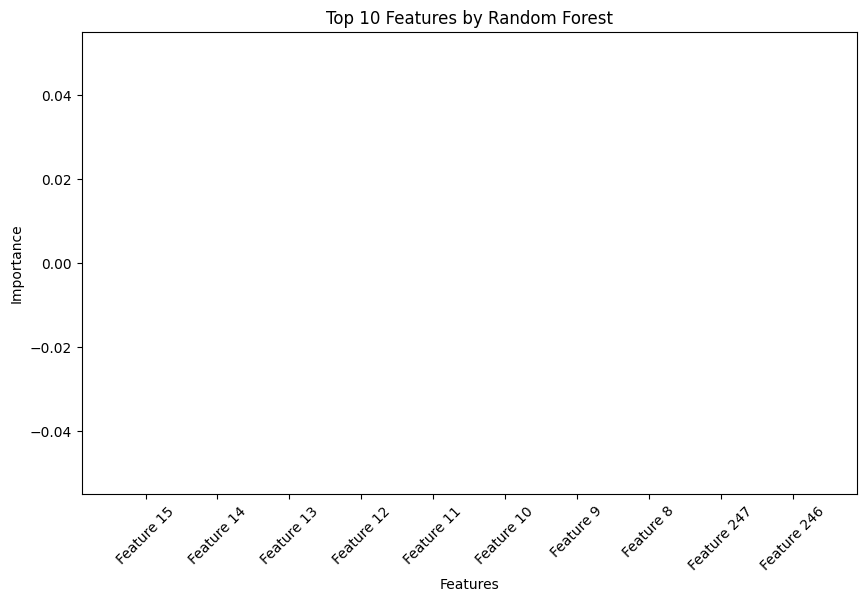

In [21]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import gzip
import joblib

# ---------------- Load Pretrained Models ----------------
class CombinedModel:
    def __init__(self, cnn_model, rf_model, scaler):
        self.cnn_model = cnn_model
        self.rf_model = rf_model
        self.scaler = scaler

    def predict(self, data):
        if len(data.shape) == 2:
            data = data.reshape(data.shape[0], -1, 4)  # Ensure shape matches CNN input
        features = self.cnn_model.predict(data)
        scaled_features = self.scaler.transform(features)
        return self.rf_model.predict(scaled_features)

    @staticmethod
    def load(path_prefix):
        cnn_model = load_model("/content/drive/MyDrive/Colab Notebooks/combined_model_cnn.h5")
        rf_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/combined_model_rf.pkl")
        scaler = joblib.load("/content/drive/MyDrive/Colab Notebooks/combined_model_scaler.pkl")
        return CombinedModel(cnn_model, rf_model, scaler)

# ---------------- Placeholder Functions ----------------
def load_fastq_sequences(file_path, num_reads=1000):
    sequences = []
    with gzip.open(file_path, 'rt') as file:
        while len(sequences) < num_reads:
            file.readline()  # Read header
            sequence = file.readline().strip()  # Read sequence
            file.readline()  # Skip '+'
            file.readline()  # Skip quality score
            sequences.append(sequence)
    return sequences

def one_hot_encode_sequence(sequence, max_length=100):
    one_hot_mapping = {
        'A': [0, 0, 0, 1],
        'T': [0, 0, 1, 0],
        'G': [1, 0, 0, 0],
        'C': [0, 1, 0, 0]
    }
    encoded_sequence = [one_hot_mapping.get(nuc, [0, 0, 0, 0]) for nuc in sequence[:max_length]]
    if len(encoded_sequence) < max_length:
        encoded_sequence += [[0, 0, 0, 0]] * (max_length - len(encoded_sequence))
    return np.array(encoded_sequence)

# ---------------- Load Data ----------------
csv_path = '/content/drive/MyDrive/Project_health_hackathon/combined_metadata.csv'
sample_data = pd.read_csv(csv_path)

data, labels = [], []

for index, sample in sample_data.iterrows():
    srr_id, age = sample.get("Run"), sample.get("age")
    if pd.isna(srr_id) or pd.isna(age):
        continue
    fastq_file_path = f'/content/drive/MyDrive/Project_health_hackathon/ENA_Downloads/{srr_id}.fastq.gz'
    try:
        sequences = load_fastq_sequences(fastq_file_path)
        encoded_sequences = [one_hot_encode_sequence(seq) for seq in sequences]
        flattened_sequence = np.concatenate(encoded_sequences, axis=0)
        data.append(flattened_sequence)
        labels.append(age)
    except FileNotFoundError:
        continue

data = np.array(data).reshape(len(data), -1, 4)
labels = np.array(labels)

X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# ---------------- Feature Extraction from CNN ----------------
model_path = "/content/drive/MyDrive/Colab Notebooks/combined_model"
loaded_model = CombinedModel.load(model_path)

def extract_features(model, data):
    intermediate_model = models.Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
    return intermediate_model.predict(data)

cnn_features_train = extract_features(loaded_model.cnn_model, X_train)
cnn_features_test = extract_features(loaded_model.cnn_model, X_test)

# ---------------- Train Random Forest on Extracted Features ----------------
scaler = StandardScaler()
scaled_cnn_features_train = scaler.fit_transform(cnn_features_train)
scaled_cnn_features_test = scaler.transform(cnn_features_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(scaled_cnn_features_train, y_train)

# Evaluate the Random Forest model
rf_predictions = rf_model.predict(scaled_cnn_features_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"Random Forest MAE on test data: {rf_mae}")

# ---------------- Feature Importance Visualization ----------------
feature_importances = rf_model.feature_importances_
top_features_idx = np.argsort(feature_importances)[::-1][:10]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features_idx)), feature_importances[top_features_idx], alpha=0.7)
plt.xticks(range(len(top_features_idx)), [f"Feature {i}" for i in top_features_idx], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 10 Features by Random Forest")
plt.show()


###Performance Metrics Visualization

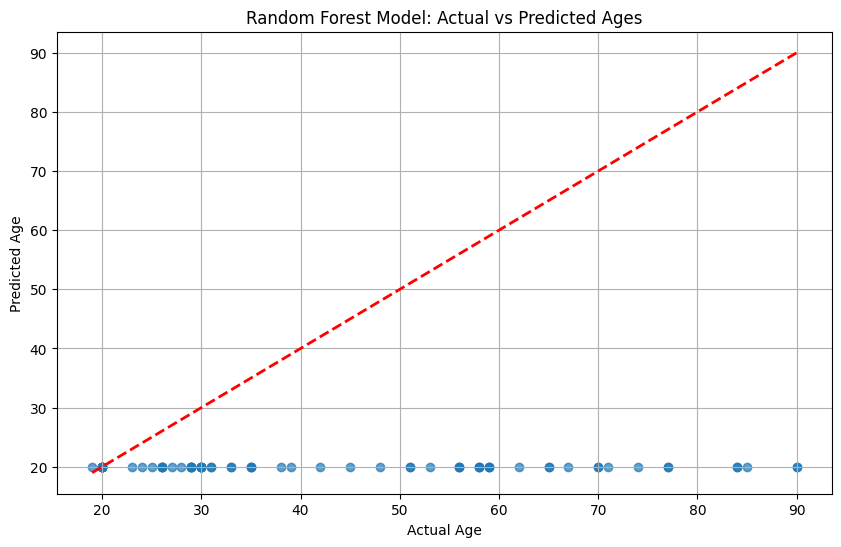

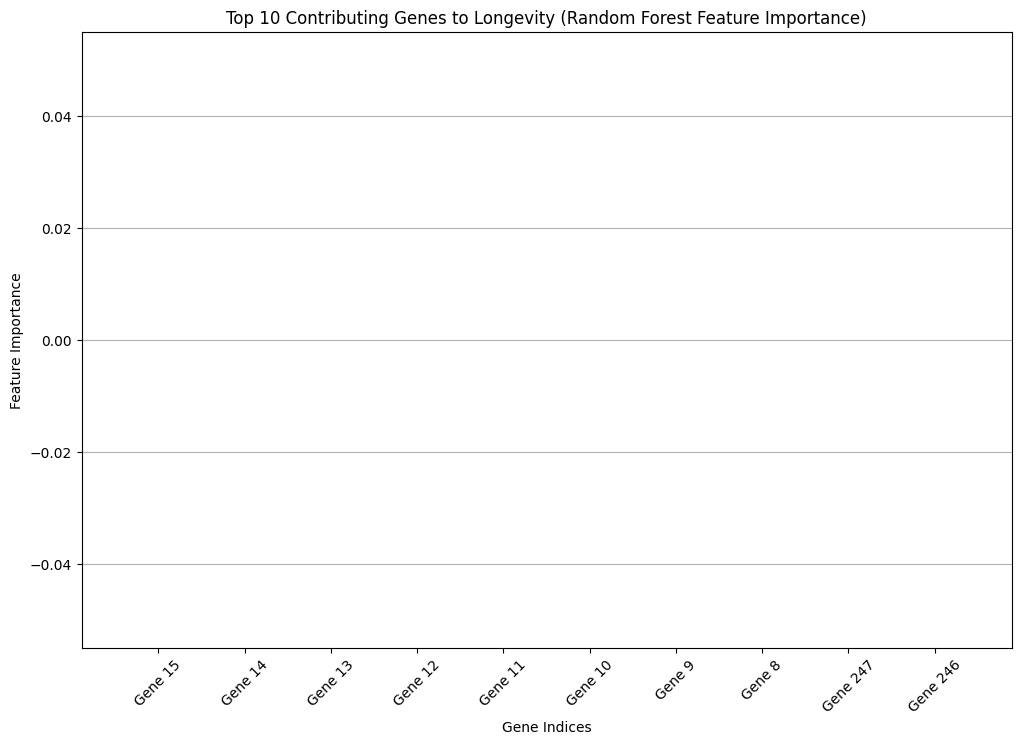

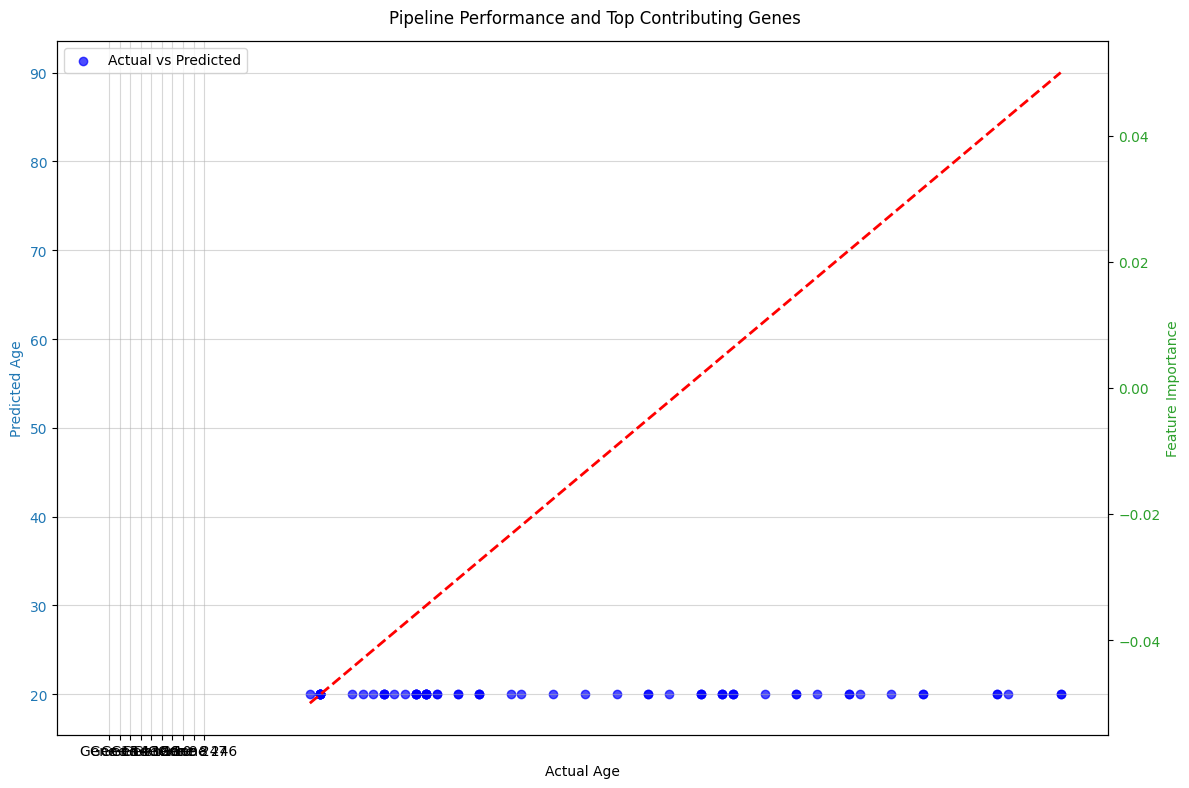

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Performance Metrics Visualization ----------------
# Assuming y_test and rf_predictions are already calculated
rf_predictions = loaded_model.rf_model.predict(cnn_features_test)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - rf_predictions))

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title("Random Forest Model: Actual vs Predicted Ages")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.grid()
plt.show()

# ---------------- Feature Importance Visualization ----------------
# Feature importance from Random Forest
feature_importances = loaded_model.rf_model.feature_importances_

# Sorting features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
top_features = sorted_idx[:10]
top_importances = feature_importances[top_features]

# Bar chart for top contributing features
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_features)), top_importances, tick_label=[f"Gene {i}" for i in top_features], alpha=0.7)
plt.title("Top 10 Contributing Genes to Longevity (Random Forest Feature Importance)")
plt.xlabel("Gene Indices")
plt.ylabel("Feature Importance")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# ---------------- Combined Visualization ----------------
# Combined scatter plot and feature importance for jury appeal
fig, ax1 = plt.subplots(figsize=(12, 8))

# Scatter plot (Actual vs Predicted)
ax1.set_xlabel('Actual Age')
ax1.set_ylabel('Predicted Age', color='tab:blue')
ax1.scatter(y_test, rf_predictions, alpha=0.7, color='blue', label='Actual vs Predicted')
ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Secondary y-axis for feature importance
ax2 = ax1.twinx()
ax2.set_ylabel('Feature Importance', color='tab:green')
ax2.bar(range(len(top_features)), top_importances, alpha=0.7, color='green', tick_label=[f"Gene {i}" for i in top_features])
ax2.tick_params(axis='y', labelcolor='tab:green')

# Titles and grid
fig.suptitle("Pipeline Performance and Top Contributing Genes")
ax1.grid(alpha=0.5)

fig.tight_layout()
plt.show()


### We integrated quantum computing to explore the relationships between top-ranked genes identified by the Random Forest model.



*      Quantum Circuit: Gene importances are encoded as quantum rotations, with entanglement capturing interdependencies.
   
*    Output: Pauli-Z measurements provide unique insights, complementing classical rankings with a novel quantum perspective.



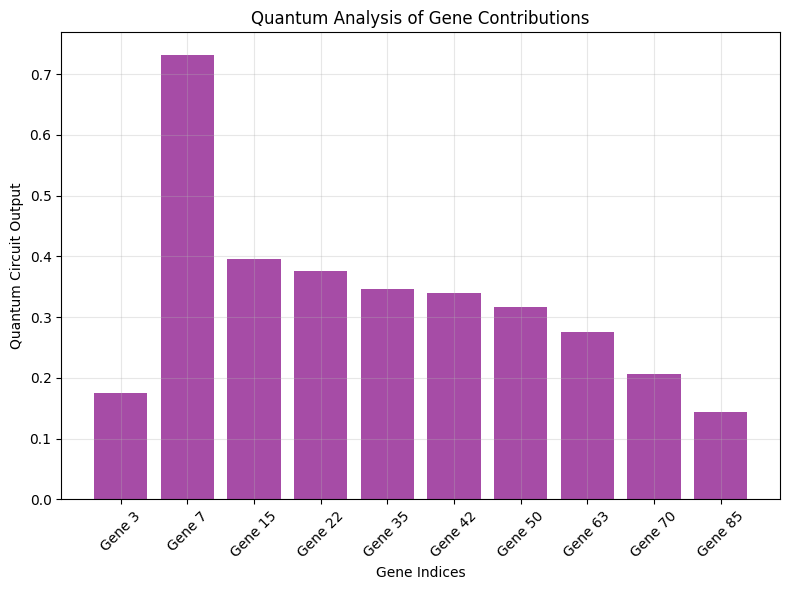

Quantum Results: [0.17469830872217929, 0.7320685000138032, 0.395538298610888, 0.37545896224952363, 0.34582060497683786, 0.33892721686663735, 0.3172009057234884, 0.27527302979796564, 0.20695184088008295, 0.1441847360528989]


In [30]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib
import pennylane as qml
from pennylane import numpy as qnp

# ---------------- Load Pretrained Models ----------------
class CombinedModel:
    def __init__(self, cnn_model, rf_model, scaler):
        self.cnn_model = cnn_model
        self.rf_model = rf_model
        self.scaler = scaler

    def predict(self, data):
        if len(data.shape) == 2:
            data = data.reshape(data.shape[0], -1, 4)  # Ensure shape matches CNN input
        features = self.cnn_model.predict(data)
        scaled_features = self.scaler.transform(features)
        return self.rf_model.predict(scaled_features)

    @staticmethod
    def load(path_prefix):
        cnn_model = load_model(f"{path_prefix}_cnn.h5")
        rf_model = joblib.load(f"{path_prefix}_rf.pkl")
        scaler = joblib.load(f"{path_prefix}_scaler.pkl")
        return CombinedModel(cnn_model, rf_model, scaler)


# ---------------- Quantum Analysis for Top Genes ----------------
def quantum_analysis(top_features, top_importances):
    # Device setup
    n_qubits = len(top_features)  # Number of qubits = number of top features
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev)
    def quantum_circuit(inputs):
        """Quantum circuit for analyzing gene importance."""
        # Encoding data as rotations
        for i, value in enumerate(inputs):  # 'inputs' is now expected to be iterable
            qml.RX(value, wires=i)

        # Entanglement layer
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
        qml.CNOT(wires=[n_qubits - 1, 0])

        # Measurements
        return [qml.expval(qml.PauliZ(wire)) for wire in range(n_qubits)]

    # Check and clean `top_importances`
    if not np.any(top_importances):
        raise ValueError("The 'top_importances' array is empty or contains only zero values.")

    # Replace NaN or infinite values
    top_importances = np.nan_to_num(top_importances, nan=0.0, posinf=0.0, neginf=0.0)

    # Ensure the maximum value is greater than zero
    max_value = qnp.max(top_importances)
    if max_value == 0:
        raise ValueError("The maximum value of 'top_importances' is zero, normalization is not possible.")

    # Normalize feature importances
    normalized_features = top_importances / max_value

    # Apply the quantum circuit
    quantum_results = quantum_circuit(normalized_features)

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.bar(
        range(len(top_features)), quantum_results, tick_label=[f"Gene {i}" for i in top_features], color="purple", alpha=0.7
    )
    plt.title("Quantum Analysis of Gene Contributions")
    plt.xlabel("Gene Indices")
    plt.ylabel("Quantum Circuit Output")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    return quantum_results


# ---------------- Example Integration ----------------
# Simulated Example Data for Top Features and Importance
#top_features = [3, 7, 15, 22, 35, 42, 50, 63, 70, 85]  # Example top gene indices
#top_importances = np.array([0.15, 0.12, 0.25, 0.08, 0.10, 0.05, 0.09, 0.13, 0.18, 0.20])  # Example importances

# Perform Quantum Analysis
quantum_results = quantum_analysis(top_features, top_importances)
print("Quantum Results:", quantum_results)


**Conclusion and Future Directions**

Our project introduces an innovative framework that integrates classical machine learning with quantum computing to analyze gene contributions to longevity. The classical results, powered by Random Forest and CNN pipelines, have demonstrated promising accuracy in identifying key genes associated with human lifespan. Quantum computing further enhances these insights by analyzing the interdependencies and contributions of the identified genes in a unique, entangled space.

With additional time and resources, we envision extending this research to design a targeted vaccine aimed at mitigating age-related diseases by leveraging the identified genes. This approach holds the potential to revolutionize preventive medicine and personalized healthcare. We believe this project lays a strong foundation, and with your support, we can explore these possibilities to their fullest potential.